# Convert TensorFlow models to ONNX

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
import tf2onnx

In [ ]:
tf_model = tf.keras.models.load_model(r"")

In [ ]:
IMG_SIZE = 256

spec = (
    tf.TensorSpec(
        shape=[None, IMG_SIZE, IMG_SIZE, 3],
        dtype=np.float32,
        name='input'
    ),
)

tf2onnx.convert.from_keras(
    tf_model,
    input_signature=spec,
    output_path=r'models/colon_diseases.onnx'
)

# Test models through the API

In [54]:
# To send data(images) to the models and get the predictions back

import requests

url = "http://127.0.0.1:8000/predict/kidney-stone/"    # specify the endpoint

files = {"file": open("test images/kidney stone/kidney0.jpg", "rb")}  # specify the img

response = requests.post(url, files=files)

print(response.json())

{'detected_image': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAKACAIAAACDr150AAEAAElEQVR4nOy9V3cjWZYdfG4ECMIRdGkqy3SXmZ7p8ZIe9KLfraWfoDdpaTRfa2aqy6Vn0sIDJCLu97D77NpxA2Sy0pHMxHnIxQQCETfuPd4GMwshhBDKssyyrNvtfvfdd998802j0djc3Ox2u1mWlWUZY8SVmUOe51mWmVmMsSzLsiyXy+VisTg/P18ul7g4z/OyLBeLxXA4HI/Hs9lsuVziJmZmZsvl8uLiAtc3m81ut9vtdtvtdqPRyPO83+9vbm6Ox+PT09Ojo6PT09PRaLRYLIqiCCHguUVRcDG5QwjBzPDtcrksiqIoirIszazRaDQajWaziTfa3NxsNBpYSZ7n9+7d+4d/+If/9t/+23/5L//lu+++293djTGen59vbGzgsvPz8/Pz8xBCs9nc2NjA6y8WiyzLms1mURQ//PDDf//v//1//I//8T//5/+czWZYpK3h7UBRjoe7XC6BeDe9uncPeEczA5YqZFm2sbGxsbEBPAeGg3ibzWar1Wq1WmVZAlEXi8XFxQUQfnNz86uvvvqrv/qrzz///A9/+MM//dM/NZvNi4uLdrt9cXExHA5nsxl+NZvNZrMZ6RTkDwoqyxLsAs+9uLg4Pz8vigJLJSvAsmOMvObi4gKfA/AhlsfrzYxPWS6XoFw+Gv8lx1gul3wceE6WZaBusqDXbrJuL3AsCryLk3wvEBzMT4ef4xXKsmw0Gtg6/RWZOX772ne85mWfIEC6me8/5SM2meIJhInLcEGj0YC0BW436vellCUXuD4o+lKuK0B2mhkQJXnuyieC42xubm5ubi4WCxCe4tzK3Um+ugKH+BUe1Gq1Op0OBXP9Edj6hHrNrCiK+Xw+mUwmk8l8PlfUX8PbQ8IT10zhagAVg0c0m03qixcXF/P5fDqdTqfTzc3NXq/XbrdBUxBd5+fnEGOq

In the case of <span style="color: red">skin-cancer OR kidney-stone</span>, the predicted img (is binary data, and APIs can't transfer binary data, only ASCII data)

so I encoded the img by base64 (base64 is a binary-to-text encoding scheme) before transfering it through the api,

So u need to decode the imag back to binary data

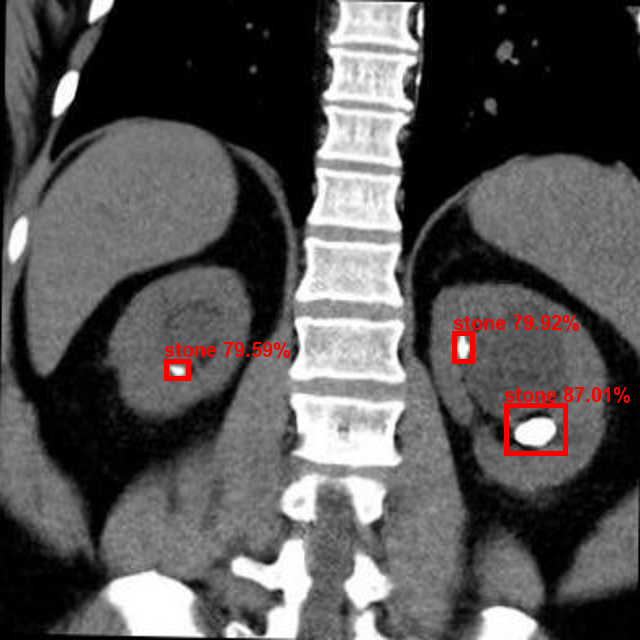

In [55]:
import base64    # for encodeing-decoding
import io
from PIL import Image

detected_image = response.json()['detected_image']
detected_image = base64.b64decode(detected_image) # decode the img
detected_image = io.BytesIO(detected_image)

detected_image = Image.open(detected_image)

detected_image